In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
import joblib
import os
warnings.filterwarnings('ignore')

1) here i imported libraries that will be used in this assignment.

In [87]:
data = pd.read_csv("breastCancer.csv")
data.shape
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

2) loading the dataset and checked it's rows and columns.

In [88]:
X , y = data.iloc[:,2:32], data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 28)

3) here i seprated the dataset into it's features and labels into X and y respectively. then just performing the train_test_split on X and y.

In [89]:
encoder = LabelEncoder() 
y_encoded = encoder.fit_transform(y)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

4) here just encoding the orignal labels that were ['B','M'] into [0,1]

In [90]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


5) using standardization on X_train and X_test.

In [91]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_encoded)
y_pred = lr.predict(X_test_scaled)
acc = np.sum(y_pred==y_test_encoded)/len(y_test_encoded)
print(acc*100,"%")

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [92]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


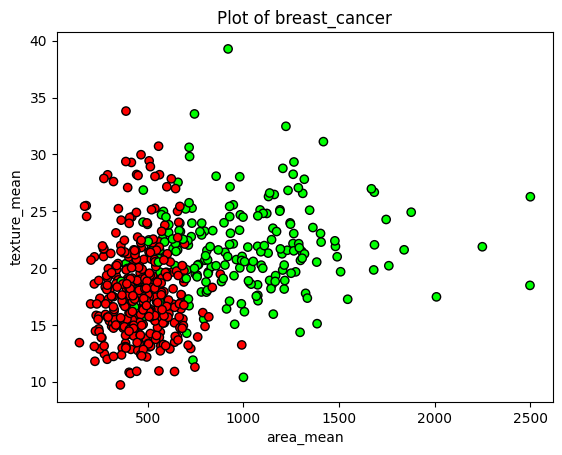

In [93]:
cmap = ListedColormap(['#FF0000','#00FF00'])
plt.figure()
plt.scatter(X['area_mean'],X['texture_mean'], c=y_encoded, cmap=cmap, edgecolor='k')
plt.title("Plot of breast_cancer")
plt.xlabel('area_mean')
plt.ylabel('texture_mean')
plt.show()

7) appling that logistic regression on scaled data and checking the accuracy.

In [94]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       147
           1       0.90      0.99      0.94        81

    accuracy                           0.96       228
   macro avg       0.95      0.96      0.95       228
weighted avg       0.96      0.96      0.96       228



8) here is the classification report of scaled data.

<Axes: >

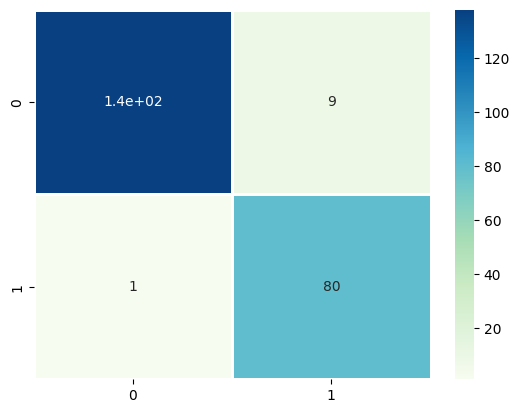

In [95]:
preprocessed_data = confusion_matrix (y_test_encoded, y_pred)
sns.heatmap(preprocessed_data,annot=True, cmap='GnBu', linewidths=.9)

9) simply using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on scaled data.

In [96]:
lr2 = LogisticRegression()
lr2.fit(X_train,y_train_encoded)
y_pred2= lr2.predict(X_test)
acc2= np.sum(y_pred2==y_test_encoded)/len(y_test_encoded)
print(acc2*100,"%")

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,

10) now applying the logistic regression on orignal unscaled data and seeing it's accuracy.

In [97]:
print(classification_report(y_test_encoded,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       147
           1       0.89      0.89      0.89        81

    accuracy                           0.92       228
   macro avg       0.91      0.91      0.91       228
weighted avg       0.92      0.92      0.92       228



11) getting the classfication report on unscaled data.

<Axes: >

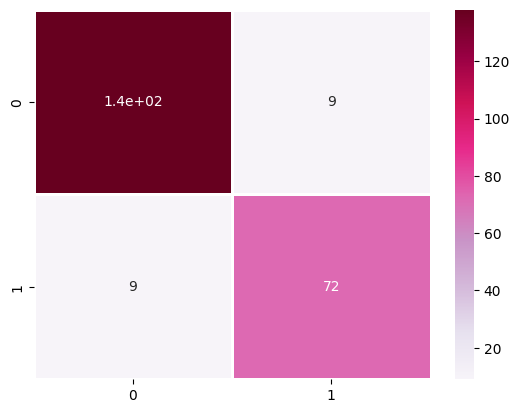

In [98]:
normal_data = confusion_matrix (y_test_encoded, y_pred2)
sns.heatmap(normal_data,annot=True, cmap='PuRd', linewidths=.9)

12) using a confussion matrix and then applying heatmap to see the accuracy of logistic regression model on unscaled data.

In [99]:
print("accuracy on scaled data = ",acc*100,"%")
print("accuracy on unscaled/orignal data = ",acc2*100,"%")

accuracy on scaled data =  95.6140350877193 %
accuracy on unscaled/orignal data =  92.10526315789474 %


13) here you can see that the accuracy of the logistic regression model is very high "94%" on the preprocessed scaled data. on the other hand the accuracy of unscaled data is very low "36%". the difference in accuracy is about "58%"

In [100]:

if not os.path.exists('Models'):
    os.mkdir('Models')
if not os.path.exists('Scalers'):
    os.mkdir('Scalers')
joblib.dump(lr, r'Models/model.pickle')
joblib.dump(scaler, r'Scalers/scaler.pickle')

['Scalers/scaler.pickle']

14. saving the model so we can load it again or on an other device after deploying it on the machine.